https://bit.ly/HDSC-StageTwoAssessment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [5]:
dataframe.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
dataframe.drop(['date','lights'], axis=1,inplace=True)

In [16]:
dataframe.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   T1           19735 non-null  float64
 2   RH_1         19735 non-null  float64
 3   T2           19735 non-null  float64
 4   RH_2         19735 non-null  float64
 5   T3           19735 non-null  float64
 6   RH_3         19735 non-null  float64
 7   T4           19735 non-null  float64
 8   RH_4         19735 non-null  float64
 9   T5           19735 non-null  float64
 10  RH_5         19735 non-null  float64
 11  T6           19735 non-null  float64
 12  RH_6         19735 non-null  float64
 13  T7           19735 non-null  float64
 14  RH_7         19735 non-null  float64
 15  T8           19735 non-null  float64
 16  RH_8         19735 non-null  float64
 17  T9           19735 non-null  float64
 18  RH_9         19735 non-null  float64
 19  T_ou

In [17]:
dataframe.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [19]:
dataframe.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [31]:
X = dataframe[['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']]
y = dataframe[['Appliances']]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)

array([[0.43294615, 0.27554825, 0.12066877, ..., 0.3       , 0.51234794,
        0.51234794],
       [0.53854277, 0.85778509, 0.37727163, ..., 0.35454545, 0.46937859,
        0.46937859],
       [0.48574446, 0.27883772, 0.11146111, ..., 0.19090909, 0.00259746,
        0.00259746],
       ...,
       [0.43681802, 0.40712719, 0.18899927, ..., 0.51742424, 0.79266914,
        0.79266914],
       [0.55015839, 0.46732456, 0.33438333, ..., 0.52272727, 0.60824256,
        0.60824256],
       [0.43294615, 0.50219298, 0.21322995, ..., 0.74393939, 0.19877963,
        0.19877963]])

In [35]:
X_minmax = pd.DataFrame(mm_scaler.transform(X_test), columns=['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'])

In [36]:
X_minmax.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.432946,0.275548,0.120669,0.543362,0.256730,0.380122,0.419820,0.254822,0.312470,0.319301,0.210623,0.635165,0.587327,0.371322,0.619049,0.347755,0.457856,0.408251,0.217578,0.921287,0.846491,0.166667,0.953846,0.300000,0.512348,0.512348
1,0.538543,0.857785,0.377272,0.724710,0.368339,0.956224,0.489489,0.553364,0.224346,0.423819,0.249417,0.971587,0.141866,0.573533,0.394568,0.615604,0.145682,0.622241,0.247588,0.588600,0.868421,0.214286,0.400000,0.354545,0.469379,0.469379
2,0.485744,0.278838,0.111461,0.583358,0.371109,0.300670,0.467568,0.235409,0.408027,0.153024,0.167929,0.504853,0.510719,0.144495,0.530363,0.343614,0.468262,0.377621,0.167203,0.858472,0.776316,0.142857,0.984615,0.190909,0.002597,0.002597
3,0.485744,0.460855,0.566271,0.416837,0.401573,0.381679,0.656757,0.300529,0.411212,0.198020,0.500874,0.094001,0.440731,0.254824,0.447971,0.290953,0.561915,0.388797,0.445338,0.895696,0.616228,0.369048,0.600000,0.468939,0.205668,0.205668
4,0.335093,0.266557,0.026411,0.571554,0.232635,0.356753,0.374775,0.288647,0.244625,0.284685,0.154332,0.710111,0.472888,0.385440,0.530363,0.342358,0.427680,0.477373,0.145766,0.938736,0.912281,0.285714,0.735897,0.234091,0.214886,0.214886


In [75]:
X_minmax.mean().min()

0.2895431859621089

In [77]:
X_minmax.mean()==0.2895431859621089

T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed       True
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool

In [29]:
X_minmax.count()

T1             5921
RH_1           5921
T2             5921
RH_2           5921
T3             5921
RH_3           5921
T4             5921
RH_4           5921
T5             5921
RH_5           5921
T6             5921
RH_6           5921
T7             5921
RH_7           5921
T8             5921
RH_8           5921
T9             5921
RH_9           5921
T_out          5921
Press_mm_hg    5921
RH_out         5921
Windspeed      5921
Visibility     5921
Tdewpoint      5921
rv1            5921
rv2            5921
dtype: int64

In [91]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [99]:
mlm = LinearRegression(Lasso(alpha=0.001, random_state=42))
mlm.fit(X_train, y_train)
y_pred = mlm.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Appliances'])

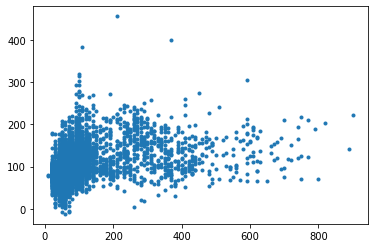

In [43]:
plt.plot(y_test,y_pred,'.')

In [100]:
x1 = dataframe[['T2']]
y1 = dataframe[['T6']]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [103]:
slm = LinearRegression(Lasso(alpha=0.001))
slm.fit(X1_train, y1_train)
y1_pred = slm.predict(X1_test)
y1_pred = pd.DataFrame(y1_pred, columns=['T6'])

In [98]:
slm = LinearRegression()
slm.fit(X1_train, y1_train)
y1_pred = slm.predict(X1_test)
y1_pred = pd.DataFrame(y1_pred, columns=['T6'])

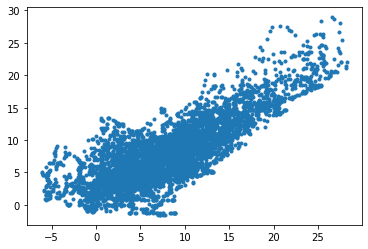

In [82]:
plt.plot(y1_test,y1_pred,'.')

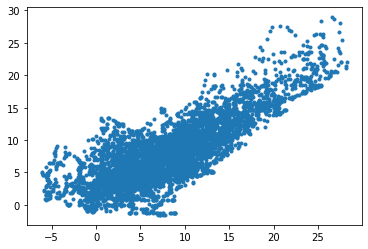

In [80]:
plt.plot(y1_test,y1_pred,'.')

In [66]:
from sklearn.metrics import r2_score
r2_score = r2_score(y1_test,y1_pred)
round(r2_score,2)

0.64

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm = pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)
features_df = norm.drop(columns=['Appliances'])
target = norm['Appliances']

In [106]:
x2_train,x2_test,y2_train,y2_test = train_test_split(features_df, target, test_size=0.3, random_state=42)

In [107]:
slm.fit(x2_train,y2_train)

LinearRegression(copy_X=True,
                 fit_intercept=Lasso(alpha=0.001, copy_X=True,
                                     fit_intercept=True, max_iter=1000,
                                     normalize=False, positive=False,
                                     precompute=False, random_state=None,
                                     selection='cyclic', tol=0.0001,
                                     warm_start=False),
                 n_jobs=None, normalize=False)

In [108]:
y2_pred = slm.predict(x2_test)

In [65]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y2_test,y2_pred)
round(mae,2)

0.05

In [67]:
rss = np.sum(np.square(y2_test-y2_pred))
round(rss,2)

45.35

In [109]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_absolute_error(y2_test,y2_pred))
round(rmse,3)

0.224

In [104]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_absolute_error(y1_test,y1_pred))
round(rmse,3)

1.68